In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams["figure.dpi"] = 500
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/SEK-11/dataset_excelR/main/DATA/Fraud_check.csv")
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
df.drop(columns="Undergrad", inplace=True)
df

,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,Single,68833,50047,10,YES
1,Divorced,33700,134075,18,YES
2,Married,36925,160205,30,YES
3,Single,50190,193264,15,YES
4,Married,81002,27533,28,NO
...,...,...,...,...,...
595,Divorced,76340,39492,7,YES
596,Divorced,69967,55369,2,YES
597,Divorced,47334,154058,0,YES
598,Married,98592,180083,17,NO


In [4]:
df.duplicated().sum()

0

In [5]:
df.isna().sum()

Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

<Axes: >

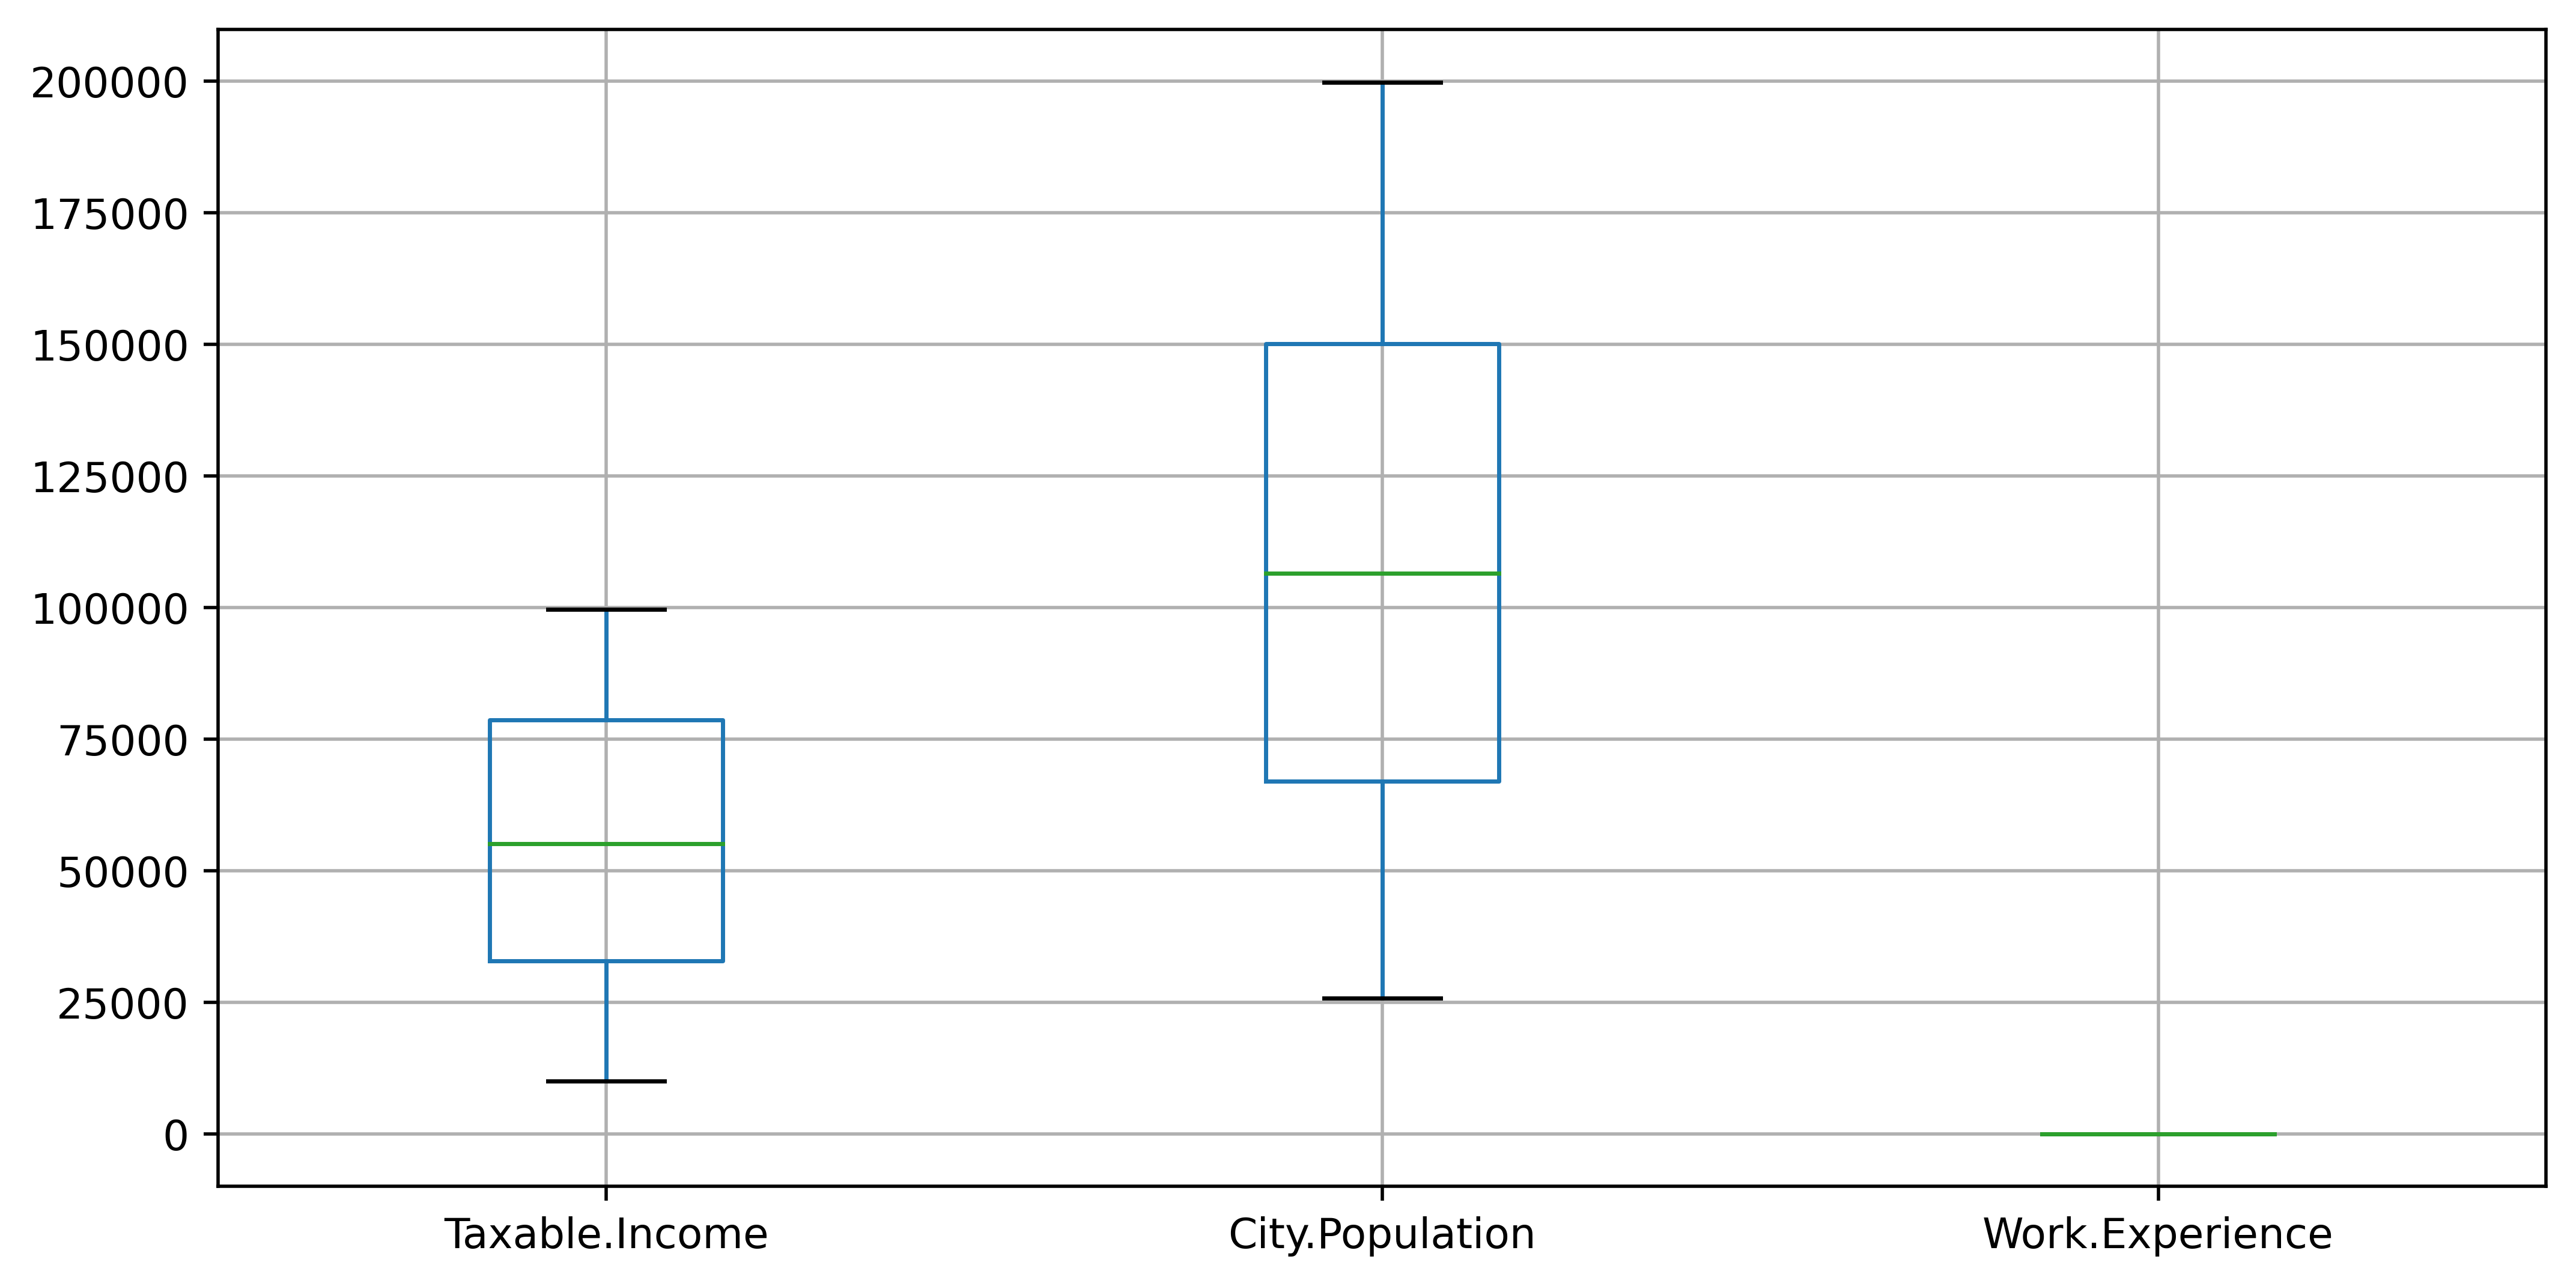

In [6]:
df.boxplot()

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [8]:
df.loc[df["Taxable.Income"] <= 30000, "Taxable.Income"] = 0

In [9]:
df.loc[df["Taxable.Income"] > 30000, "Taxable.Income"] = 1

In [10]:
df.loc[df["Taxable.Income"] == 0, "Taxable.Income"] = "Risky"

In [11]:
df.loc[df["Taxable.Income"] == 1, "Taxable.Income"] = "Good"

In [12]:
df["Taxable.Income"].unique()

array(['Good', 'Risky'], dtype=object)

In [13]:
df = pd.get_dummies(columns=["Marital.Status", "Urban"], data=df)
df

,Taxable.Income,City.Population,Work.Experience,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,Good,50047,10,0,0,1,0,1
1,Good,134075,18,1,0,0,0,1
2,Good,160205,30,0,1,0,0,1
3,Good,193264,15,0,0,1,0,1
4,Good,27533,28,0,1,0,1,0
...,...,...,...,...,...,...,...,...
595,Good,39492,7,1,0,0,0,1
596,Good,55369,2,1,0,0,0,1
597,Good,154058,0,1,0,0,0,1
598,Good,180083,17,0,1,0,1,0


In [14]:
x = df.drop(columns="Taxable.Income")
y = df["Taxable.Income"]

In [15]:
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[-1.17852072, -0.62914254, -0.67812537, ...,  1.32852435,
        -0.99335541,  0.99335541],
       [ 0.50850002,  0.27636996,  1.47465358, ..., -0.75271484,
        -0.99335541,  0.99335541],
       [ 1.03310911,  1.63463872, -0.67812537, ..., -0.75271484,
        -0.99335541,  0.99335541],
       ...,
       [ 0.90969648, -1.76103318,  1.47465358, ..., -0.75271484,
        -0.99335541,  0.99335541],
       [ 1.43219749,  0.1631809 , -0.67812537, ..., -0.75271484,
         1.00668904, -1.00668904],
       [ 0.9915901 ,  0.04999184,  1.47465358, ..., -0.75271484,
         1.00668904, -1.00668904]])

In [16]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=42)

In [17]:
rfc = RandomForestClassifier()
rfc.fit(xtrain, ytrain)
ypred = rfc.predict(xtest)
ypred

array(['Risky', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Goo

In [18]:
rfc.score(xtrain, ytrain), rfc.score(xtest, ytest)

(1.0, 0.7833333333333333)

In [19]:
param_grid = {
    'bootstrap' : [True, False],
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [20]:
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(xtrain, ytrain)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [21]:
best_params = grid_search.best_params_
best_params

{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 100}

In [22]:
rfc = RandomForestClassifier(bootstrap = True,
 max_depth = None,
 max_features = 'auto',
 min_samples_leaf = 4,
 min_samples_split = 10,
 n_estimators = 100)
 
rfc.fit(xtrain, ytrain)
ypred = rfc.predict(xtest)
ypred

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
     

In [23]:
rfc.score(xtrain, ytrain), rfc.score(xtest, ytest)

(0.80625, 0.775)